# Лабораторная работа 3. 
# «Стохастические модели - метод Монте-Карло»
## Вариант 10

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# параметры спиралей: r = a*theta
alpha = 0.5  # внутренняя спираль
beta = 1.0   # внешняя спираль
theta_max = 6 * math.pi  # 3 витка

In [3]:
# ограничивающий квадрат
R_max = beta * theta_max
x_min, x_max = -R_max, R_max
y_min, y_max = -R_max, R_max
rect_area = (x_max - x_min) * (y_max - y_min)

In [4]:
# функция
def f(x, y):
    return x**2 + y**3

In [5]:
# проверка: точка внутри области между спиралями
def in_region(x, y, alpha=alpha, beta=beta, theta_max=theta_max):
    r = math.hypot(x, y)
    if r == 0:
        return True
    theta0 = math.atan2(y, x)
    if theta0 < 0:
        theta0 += 2*math.pi
    # пробуем все 3 витка
    for k in range(3):
        theta = theta0 + 2*math.pi*k
        if theta <= theta_max:
            r_in = alpha * theta
            r_out = beta * theta
            if r_in <= r <= r_out:
                return True
    return False

In [9]:
def draw(N):
    xs = np.random.uniform(x_min, x_max, N)
    ys = np.random.uniform(y_min, y_max, N)
    
    inside_mask = np.array([in_region(x, y) for x, y in zip(xs, ys)])
    dots_in = np.sum(inside_mask)
    dots_out = N - dots_in

    # площадь
    area_mc = rect_area * dots_in / N
    
    # интеграл
    sum_I = np.sum([f(x, y) for x, y in zip(xs[inside_mask], ys[inside_mask])])
    I_mc = rect_area * sum_I / N
    
    print("Rectangle area =", rect_area)
    print("Dots in:", dots_in)
    print("Dots out:", dots_out)
    print("Estimated area of spiral region =", area_mc)
    print("Integral ≈", I_mc)

    # график
    theta = np.linspace(0, theta_max, 2000)
    r_in = alpha * theta
    r_out = beta * theta
    x_in = r_in * np.cos(theta)
    y_in = r_in * np.sin(theta)
    x_out = r_out * np.cos(theta)
    y_out = r_out * np.sin(theta)
    
    plt.figure(figsize=(6,6))
    plt.plot(x_in, y_in, 'r')
    plt.plot(x_out, y_out, 'r')
    plt.scatter(xs, ys, c=['blue' if m else 'orange' for m in inside_mask], s=1)
    plt.gca().set_aspect('equal')
    plt.show()

Rectangle area = 1421.2230337568676
Dots in: 47
Dots out: 53
Estimated area of spiral region = 667.9748258657278
Integral ≈ -282854.6449232872


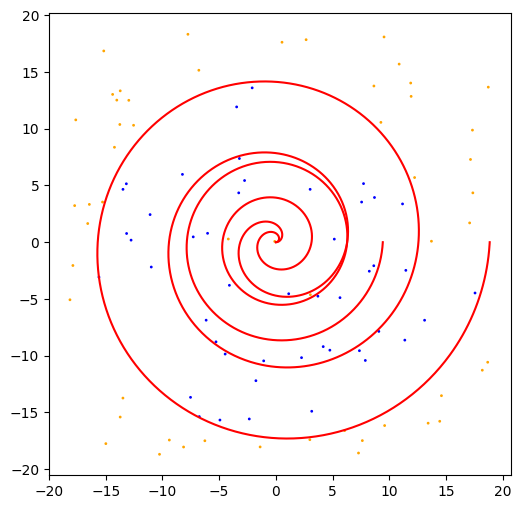

In [10]:
draw(100)

Rectangle area = 1421.2230337568676
Dots in: 507
Dots out: 493
Estimated area of spiral region = 720.5600781147318
Integral ≈ -194317.50512361774


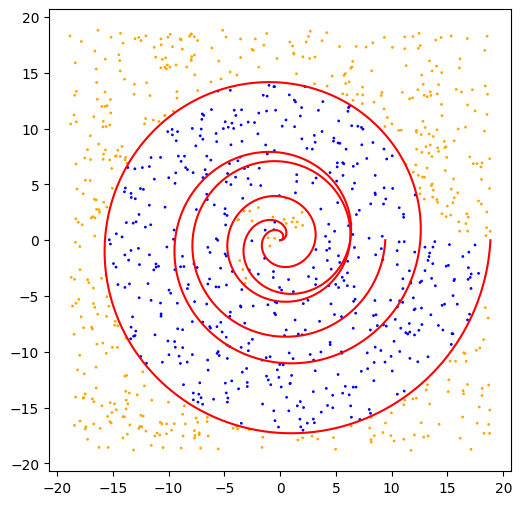

In [11]:
draw(1000)

Rectangle area = 1421.2230337568676
Dots in: 5277
Dots out: 4723
Estimated area of spiral region = 749.979394913499
Integral ≈ -221993.05771505972


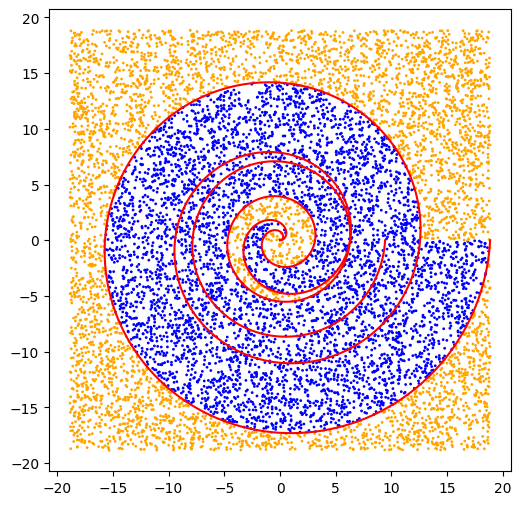

In [12]:
draw(10000)

Rectangle area = 1421.2230337568676
Dots in: 52030
Dots out: 47970
Estimated area of spiral region = 739.4623444636983
Integral ≈ -206090.4804912316


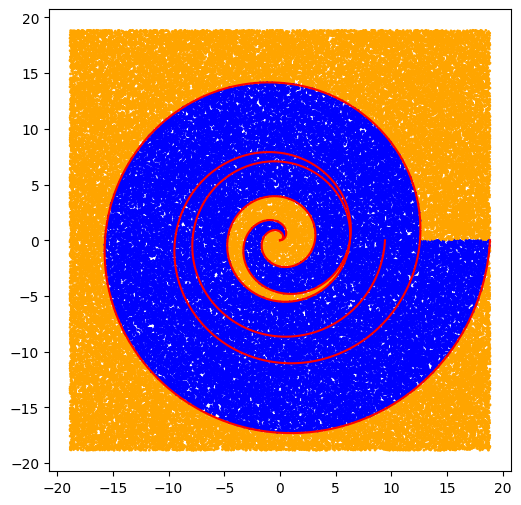

In [13]:
draw(100000)

Rectangle area = 1421.2230337568676
Dots in: 524006
Dots out: 475994
Estimated area of spiral region = 744.729397026801
Integral ≈ -209532.06329669038


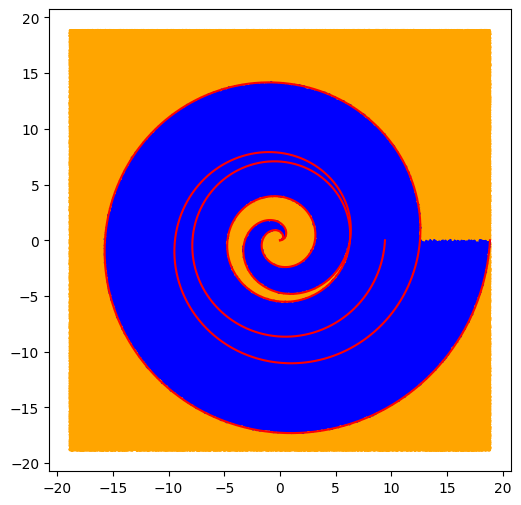

In [14]:
draw(1000000)